In [ ]:
import pandas as pd
import numpy as np
from numpy import random
import math
import scipy.stats as stats
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/lab2.csv')
df1.head(5)

,Name,User Detail,Time,Customer Review,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,d4r55,RfnDt,rsqaWe,wiI7pd,NaN,NaN,NaN,NaN
1,Anjum Ahmed,Local Guide � 29 reviews � 4 photos,6 days ago,Very nice and reasonable theatre to watch movi...,NaN,NaN,NaN,NaN
2,Anu Libran,Local Guide � 64 reviews � 124 photos,8 months ago,Place is good for a movie. Not much to explore...,NaN,NaN,NaN,NaN
3,Kashif Mansuri,2 reviews � 1 photo,5 months ago,Took myself into an actual cinema again after ...,NaN,NaN,NaN,NaN
4,Sreeram,Local Guide � 126 reviews � 229 photos,a month ago,Excited and excellent\nThe logistics and locat...,NaN,NaN,NaN,NaN


In [ ]:
df1.isna().sum()

Name                  0
User Detail           0
Time                  0
Customer Review       0
Unnamed: 4         1039
Unnamed: 5         1041
Unnamed: 6         1041
Unnamed: 7         1040
dtype: int64

In [ ]:
clean_df = df1.dropna(axis=1)

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             1041 non-null   object
 1   User Detail      1041 non-null   object
 2   Time             1041 non-null   object
 3   Customer Review  1041 non-null   object
dtypes: object(4)
memory usage: 32.7+ KB


In [ ]:
clean_df.drop(0,axis=0,inplace=True)

<ipython-input-6-b287ead7659b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop(0,axis=0,inplace=True)


In [ ]:
clean_df.head()

,Name,User Detail,Time,Customer Review
1,Anjum Ahmed,Local Guide � 29 reviews � 4 photos,6 days ago,Very nice and reasonable theatre to watch movi...
2,Anu Libran,Local Guide � 64 reviews � 124 photos,8 months ago,Place is good for a movie. Not much to explore...
3,Kashif Mansuri,2 reviews � 1 photo,5 months ago,Took myself into an actual cinema again after ...
4,Sreeram,Local Guide � 126 reviews � 229 photos,a month ago,Excited and excellent\nThe logistics and locat...
5,KS,3 reviews,3 months ago,"Very unprofessional. In today's era, being a m..."


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 1 to 1040
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             1040 non-null   object
 1   User Detail      1040 non-null   object
 2   Time             1040 non-null   object
 3   Customer Review  1040 non-null   object
dtypes: object(4)
memory usage: 32.6+ KB


In [ ]:
clean_df['User Detail'].unique()

array(['Local Guide � 29 reviews � 4 photos',
       'Local Guide � 64 reviews � 124 photos', '2 reviews � 1 photo',
       'Local Guide � 126 reviews � 229 photos', '3 reviews',
       'Local Guide � 114 reviews � 33 photos', '40 reviews',
       'Local Guide � 16 reviews � 12 photos',
       'Local Guide � 82 reviews � 682 photos',
       'Local Guide � 94 reviews � 39 photos',
       'Local Guide � 15 reviews � 12 photos',
       'Local Guide � 354 reviews � 1,008 photos',
       'Local Guide � 94 reviews � 1,578 photos', '8 reviews',
       '4 reviews', 'Local Guide � 67 reviews � 64 photos', '81 reviews',
       '44 reviews � 27 photos', 'Local Guide � 15 reviews � 66 photos',
       'Local Guide � 23 reviews � 130 photos',
       'Local Guide � 374 reviews � 1,671 photos', '3 reviews � 3 photos',
       '11 reviews', 'Local Guide � 51 reviews � 224 photos',
       'Local Guide � 72 reviews � 352 photos',
       'Local Guide � 658 reviews � 202 photos',
       'Local Guide � 63 re

In [ ]:
local=[0]*1040
for index,det in enumerate(clean_df['User Detail']):

  if "Local Guide" in det:
    local[index]=1
  else:
    local[index]=0

clean_df=clean_df.assign(local_guide=list(local))

In [ ]:
clean_df.head()

,Name,User Detail,Time,Customer Review,local_guide
1,Anjum Ahmed,Local Guide � 29 reviews � 4 photos,6 days ago,Very nice and reasonable theatre to watch movi...,1
2,Anu Libran,Local Guide � 64 reviews � 124 photos,8 months ago,Place is good for a movie. Not much to explore...,1
3,Kashif Mansuri,2 reviews � 1 photo,5 months ago,Took myself into an actual cinema again after ...,0
4,Sreeram,Local Guide � 126 reviews � 229 photos,a month ago,Excited and excellent\nThe logistics and locat...,1
5,KS,3 reviews,3 months ago,"Very unprofessional. In today's era, being a m...",0


In [ ]:
clean_df = clean_df.drop(['User Detail'], axis=1)

In [ ]:
clean_df.head()

,Name,Time,Customer Review,local_guide
1,Anjum Ahmed,6 days ago,Very nice and reasonable theatre to watch movi...,1
2,Anu Libran,8 months ago,Place is good for a movie. Not much to explore...,1
3,Kashif Mansuri,5 months ago,Took myself into an actual cinema again after ...,0
4,Sreeram,a month ago,Excited and excellent\nThe logistics and locat...,1
5,KS,3 months ago,"Very unprofessional. In today's era, being a m...",0


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 1 to 1040
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             1040 non-null   object
 1   Time             1040 non-null   object
 2   Customer Review  1040 non-null   object
 3   local_guide      1040 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 32.6+ KB


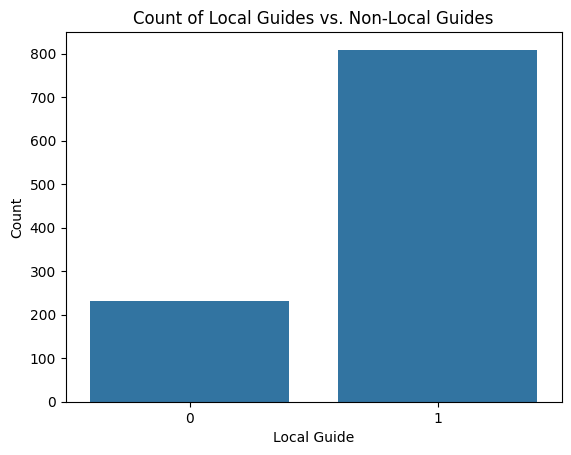

In [ ]:

# Count of local guides vs. non-local guides
sns.countplot(x='local_guide', data=clean_df)
plt.title('Count of Local Guides vs. Non-Local Guides')
plt.xlabel('Local Guide')
plt.ylabel('Count')
plt.show()


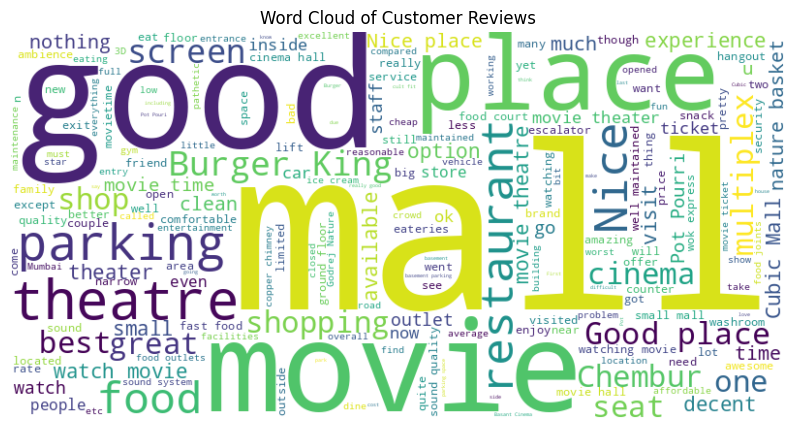

In [ ]:
# Word cloud for customer reviews
from wordcloud import WordCloud

# Combine all reviews into a single string
reviews_text = ' '.join(clean_df['Customer Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Customer Reviews')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Topics:
Topic 1:
mall burger king movie chembur

Topic 2:
good place mall movie movies

Topic 3:
movie place good theater seats



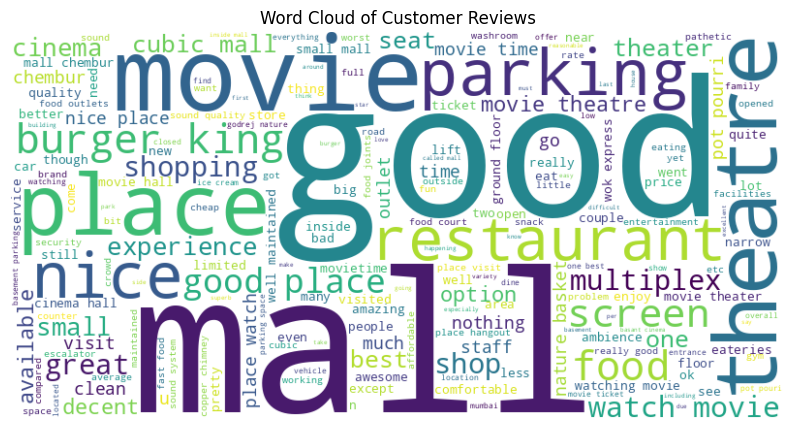

In [ ]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

clean_df['Cleaned Review'] = clean_df['Customer Review'].apply(preprocess_text)

# Perform sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

clean_df['Sentiment'] = clean_df['Customer Review'].apply(get_sentiment)

# Topic modeling with LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(clean_df['Cleaned Review'])
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(doc_term_matrix)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

print("Topics:")
display_topics(lda_model, vectorizer.get_feature_names_out(), 5)

# Word cloud of customer reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(clean_df['Cleaned Review']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews')
plt.show()



<ipython-input-30-ba088149a55c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=clean_df, palette='viridis')


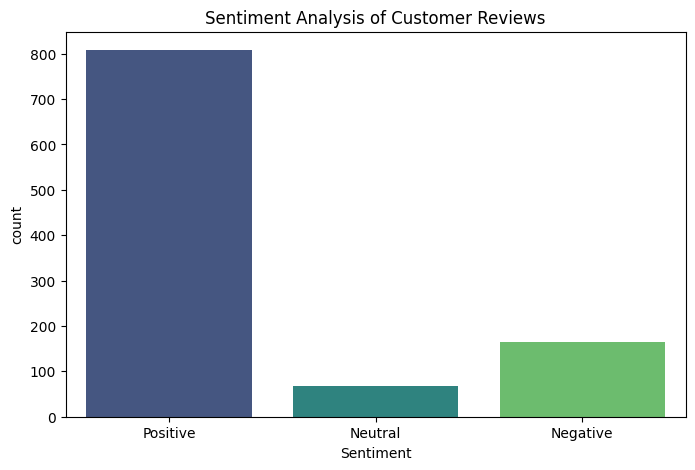

In [ ]:
# Sentiment analysis visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=clean_df, palette='viridis')
plt.title('Sentiment Analysis of Customer Reviews')
plt.show()


In [ ]:
####### lab6
###  https://colab.research.google.com/drive/103a9vX7vYqDS5UNe7jr-ZBFdGPWDAIx-?usp=sharing

import networkx as nx
import matplotlib.pyplot as plt
# Load the Zachary Karate Club dataset
G = nx.karate_club_graph()
# Print basic information about the dataset
print("Number of nodes (members):", G.number_of_nodes())
print("Number of edges (friendships):", G.number_of_edges())
print("List of nodes (members):", list(G.nodes()))
print("List of edges (friendships):", list(G.edges()))
print("Node attributes (member's club affiliation):")
for node in G.nodes(data=True):
  print(node)

In [ ]:
# Visualize the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Zachary Karate Club Network Graph')
plt.show()

In [ ]:
communities = nx.algorithms.community.greedy_modularity_communities(G)
print("Communities Detected:")
for i, community in enumerate(communities):
  print(f"Community {i+1}: {community}")


centrality = nx.algorithms.centrality.betweenness_centrality(G)
influential_users = sorted(centrality, key=centrality.get, reverse=True)[:2]
print("\nMost Influential Users:")
for user in influential_users:
  print(user)


In [ ]:
### lab9
import nltk
nltk.download('vader_lexicon')


import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
# Download NLTK resources
nltk.download('vader_lexicon')
# Load dataset
df = pd.read_csv('smalab9comparative.csv')
# Drop rows with missing values
df_cleaned = df.dropna()
# Create a sentiment analyzer object
sid = SentimentIntensityAnalyzer()
# Function to get sentiment score
def get_sentiment_score(text):
  sentiment_scores = sid.polarity_scores(text)
  # Return compound sentiment score
  return sentiment_scores['compound']

# Separate reviews for each product
boat_reviews = df_cleaned[df_cleaned['product'] == 'boat']['Text']
jbl_reviews = df_cleaned[df_cleaned['product'] == 'jbl']['Text']
oneplus_reviews = df_cleaned[df_cleaned['product'] == 'oneplus']['Text']
# Perform sentiment analysis for each product
boat_sentiments = [get_sentiment_score(review) for review in boat_reviews]
jbl_sentiments = [get_sentiment_score(review) for review in jbl_reviews]
oneplus_sentiments = [get_sentiment_score(review) for review in oneplus_reviews]
# Calculate average sentiment scores
boat_avg_sentiment = sum(boat_sentiments) / len(boat_sentiments)
jbl_avg_sentiment = sum(jbl_sentiments) / len(jbl_sentiments)
oneplus_avg_sentiment = sum(oneplus_sentiments) / len(oneplus_sentiments)
# Visualization
products = ['Boat', 'JBL', 'OnePlus']
avg_sentiments = [boat_avg_sentiment, jbl_avg_sentiment, oneplus_avg_sentiment]
plt.figure(figsize=(10, 6))
plt.bar(products, avg_sentiments, color=['blue', 'green', 'orange'])
plt.title('Average Sentiment Scores for Different Products')
plt.xlabel('Product')
plt.ylabel('Average Sentiment Score')
plt.ylim(-1, 1) # Set y-axis limit to -1 to 1 for sentiment scores
plt.grid(axis='y')
plt.show()


print("Average Sentiment Scores:")
print("Boat:", boat_avg_sentiment)
print("JBL:", jbl_avg_sentiment)
print("OnePlus:", oneplus_avg_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#### lab10

